In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.optimizers import SGD
from cnn.resnet import ResNet
from cnn import config
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse

import matplotlib
matplotlib.use("Agg")
'''
ap = argparse.ArgumentParser()
ap.add_argument("-p", "--plot", type=str, default="plot.png",
	help="path to output loss/accuracy plot")
args = vars(ap.parse_args())
'''
num_epochs = 35
init_lr= 1e-1
bs = 32
 


def poly_decay(epoch):

	maxEpochs = num_epochs
	baseLR = init_lr
	power = 0.5 
 
	
	alpha = baseLR * (1 - (epoch / float(maxEpochs))) ** power
 

	return alpha


totalTrain = len(list(paths.list_images(config.train_path)))
totalVal = len(list(paths.list_images(config.val_path)))
totalTest = len(list(paths.list_images(config.test_path)))

trainAug = ImageDataGenerator(
	rescale=1 / 255.0,
	rotation_range=20,
	zoom_range=0.05,
	width_shift_range=0.05,
	height_shift_range=0.05,
	shear_range=0.05,
	horizontal_flip=True,
	fill_mode="nearest")

valAug = ImageDataGenerator(rescale=1 / 255.0)

trainGen = trainAug.flow_from_directory(
	config.train_path,
	class_mode="categorical",
	target_size=(64, 64),
	color_mode="rgb",
	shuffle=True,
	batch_size=bs)
 

valGen = valAug.flow_from_directory(
	config.val_path,
	class_mode="categorical",
	target_size=(64, 64),
	color_mode="rgb",
	shuffle=False,
	batch_size=bs)
 

testGen = valAug.flow_from_directory(
	config.test_path,
	class_mode="categorical",
	target_size=(64, 64),
	color_mode="rgb",
	shuffle=False,
	batch_size=bs)

model = ResNet.build(64, 64, 3, 2, (3, 4, 6),
	(64, 128, 256, 512), reg=0.0005)
opt = SGD(lr=init_lr, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

model.summary()


Using TensorFlow backend.


Found 671 images belonging to 2 classes.
Found 74 images belonging to 2 classes.
Found 187 images belonging to 2 classes.
Model: "resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 64, 64, 3)    12          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 64)   4800        batch_normalization_1[0][0]      
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 64, 64, 64)   256         conv2

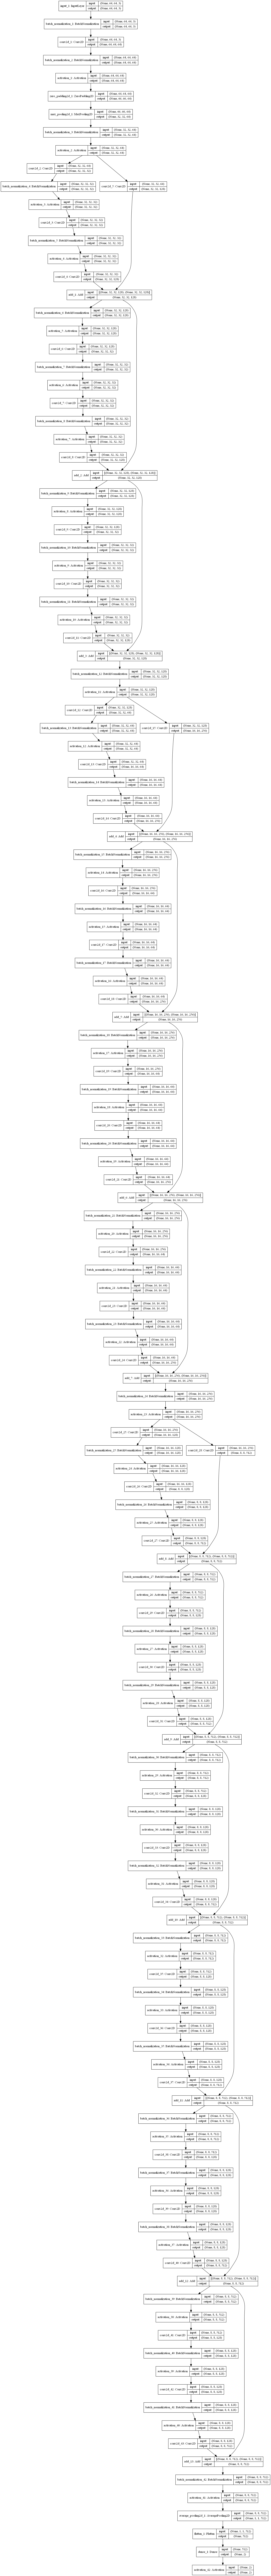

In [2]:
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [1]:
callbacks = [LearningRateScheduler(poly_decay)]
H = model.fit_generator(
	trainGen,
	steps_per_epoch=totalTrain // bs,
	validation_data=valGen,
	validation_steps=totalVal // bs,
	epochs=num_epochs,
	callbacks=callbacks)

print("[INFO] evaluating network...")
testGen.reset()
predIdxs = model.predict_generator(testGen,
	steps=(totalTest // bs) + 1)
 

predIdxs = np.argmax(predIdxs, axis=1) 
 

print(classification_report(testGen.classes, predIdxs,
	target_names=testGen.class_indices.keys()))

N = num_epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])

Using TensorFlow backend.


Found 671 images belonging to 2 classes.
Found 74 images belonging to 2 classes.
Found 187 images belonging to 2 classes.
Epoch 1/35
20/20 [==============================] - 57s 3s/step - loss: 0.9458 - accuracy: 0.8281 - val_loss: 0.5959 - val_accuracy: 0.6094
Epoch 2/35
20/20 [==============================] - 47s 2s/step - loss: 0.8024 - accuracy: 0.9248 - val_loss: 1.3290 - val_accuracy: 0.8333
Epoch 3/35
20/20 [==============================] - 41s 2s/step - loss: 0.8270 - accuracy: 0.9092 - val_loss: 1.0729 - val_accuracy: 0.9286
Epoch 4/35
20/20 [==============================] - 43s 2s/step - loss: 0.7870 - accuracy: 0.9218 - val_loss: 3.4366 - val_accuracy: 0.7969
Epoch 5/35
20/20 [==============================] - 43s 2s/step - loss: 0.8026 - accuracy: 0.9187 - val_loss: 0.9764 - val_accuracy: 0.8571
Epoch 6/35
20/20 [==============================] - 42s 2s/step - loss: 0.7565 - accuracy: 0.9280 - val_loss: 0.6238 - val_accuracy: 0.9048
Epoch 7/35
20/20 [====================

KeyboardInterrupt: 

In [1]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


In [8]:
from sklearn.metrics import roc_curve

In [31]:
accuracy = H.history['accuracy']
val_accuracy = H.history['val_accuracy']
loss = H.history['loss']

val_loss = H.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, '-', label='Training Accuracy')
plt.legend()
plt.savefig('F:\plou')

In [27]:
plt.plot(epochs, val_accuracy, '-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')

plt.savefig('F:\plow')

In [28]:
plt.plot(epochs, loss, '-', label = 'Training Loss')
plt.title('Training Loss')
plt.savefig('F:\plowe')

In [29]:
plt.plot(epochs, val_loss, '-', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('F:\plowie')

In [47]:
accuracy = H.history['accuracy']
val_accuracy = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']
epochs = range(len(accuracy))
line1=plt.plot(epochs, accuracy,'-b',label='line1')
plt.legend('label1')
line2=plt.plot(epochs, val_accuracy,'-g',label='line2')
line3=plt.plot(epochs,loss,'-c',label='line3')
line4=plt.plot(epochs,val_loss,'-k',label='line4')

plt.legend((line1, line2, line3,line4), ('label1', 'label2', 'label3','label4'))
plt.savefig('D:plot')

d:\anacona3\envs\tf_gpuu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000024C6DE9A7C8>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if sys.path[0] == '':
d:\anacona3\envs\tf_gpuu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000024C6DE9ACC8>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  if sys.path[0] == '':
d:\anacona3\envs\tf_gpuu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000024C6DFEA488>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specif

In [55]:
accuracy = H.history['accuracy']
val_accuracy = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']
epochs = range(len(accuracy))
plt.clf()
plt.plot(epochs, accuracy,'-b',label='Training Accuracy')
plt.plot(epochs, val_accuracy,'-g',label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.legend()
plt.savefig("F:plowwwww")

In [54]:
plt.clf()
plt.plot(epochs,loss,'-c',label='Training Loss')
plt.plot(epochs,val_loss,'-k',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.savefig("D:plow")